## DUSP1 Confirmation Notebook
The purpose of this notebook is to:
1. Confirm successful segmentation.
2. Confirm successful BigFISH spot and cluster detection.
3. Refine spots and clusters through additional filtering (SNR) for gating and final dataframe preparation (determine if best before or after total concatenation):  
    a. Find SNR threshold.  
    b. Filter `df_spots`.  
    c. (Optional) Check to see if removed spot was in a cluster (very unlikely due to how clusters are defined).  
    d. Create final dataframes (`df_spots`, `df_clusters`, `df_cellspots`, `df_cellprops`).  
    e. Save the dataframes.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.array as da
import os
import sys
import logging


logging.getLogger('matplotlib.font_manager').disabled = True
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.WARNING)

matplotlib_logger = logging.getLogger('matplotlib')
matplotlib_logger.setLevel(logging.WARNING)

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(src_path)
sys.path.append(src_path)

from src.Analysis import AnalysisManager, Analysis, SpotDetection_SNRConfirmation, Spot_Cluster_Analysis_WeightedSNR, GR_Confirmation

c:\Users\formanj\GitHub\AngelFISH


Loads in the data from specified location

In [2]:
loc = None 
log_location = r'\\munsky-nas.engr.colostate.edu\share\Users\Eric\AngelFISH_data'  #  r'/Volumes/share/Users/Jack/All_Analysis'
am = AnalysisManager(location=loc, log_location=log_location, mac=False) 

In [3]:
# list all analysis done 
am.list_analysis_names()

Analysis_GR_C_Jan2724_2025-01-27
Analysis_DUSP1_F_Jan2725_2025-01-27
Analysis_DUSP1_E_Jan2725_2025-01-27
Analysis_DUSP1_M_Jan2125_2025-01-21
Analysis_DUSP1_G_Jan2725_2025-01-27
Analysis_GR_B_Jan2424_2025-01-25
Analysis_DUSP1_D_Jan2125_2025-01-22
Analysis_demo_2025-01-21
Analysis_GR_A_Jan2424_2025-01-24
Analysis_demo_2025-01-22
Analysis_ER_Dec0324_DUSP1_2025-01-25
Analysis_GR_A_Jan2324_2025-01-24


['Analysis_GR_C_Jan2724_2025-01-27',
 'Analysis_DUSP1_F_Jan2725_2025-01-27',
 'Analysis_DUSP1_E_Jan2725_2025-01-27',
 'Analysis_DUSP1_M_Jan2125_2025-01-21',
 'Analysis_DUSP1_G_Jan2725_2025-01-27',
 'Analysis_GR_B_Jan2424_2025-01-25',
 'Analysis_DUSP1_D_Jan2125_2025-01-22',
 'Analysis_demo_2025-01-21',
 'Analysis_GR_A_Jan2424_2025-01-24',
 'Analysis_demo_2025-01-22',
 'Analysis_ER_Dec0324_DUSP1_2025-01-25',
 'Analysis_GR_A_Jan2324_2025-01-24']

In [4]:
# can filter on naDe and dates
am.select_analysis('DUSP1_D_Jan2125')


In [5]:
print(am.analysis_names)
am.location

['Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22']


['\\\\munsky-nas.engr.colostate.edu\\share\\smFISH_images\\Eric_smFISH_images\\20220225\\DUSP1_Dex_0min_20220224\\DUSP1_Dex_0min_20220224.h5',
 '\\\\munsky-nas.engr.colostate.edu\\share\\smFISH_images\\Eric_smFISH_images\\20220225\\DUSP1_Dex_10min_20220224\\DUSP1_Dex_10min_20220224.h5',
 '\\\\munsky-nas.engr.colostate.edu\\share\\smFISH_images\\Eric_smFISH_images\\20220305\\DUSP1_Dex_120min_20220224\\DUSP1_Dex_120min_20220224.h5',
 '\\\\munsky-nas.engr.colostate.edu\\share\\smFISH_images\\Eric_smFISH_images\\20220305\\DUSP1_Dex_150min_20220224\\DUSP1_Dex_150min_20220224.h5',
 '\\\\munsky-nas.engr.colostate.edu\\share\\smFISH_images\\Eric_smFISH_images\\20220305\\DUSP1_Dex_180min_20220224\\DUSP1_Dex_180min_20220224.h5',
 '\\\\munsky-nas.engr.colostate.edu\\share\\smFISH_images\\Eric_smFISH_images\\20220225\\DUSP1_Dex_20min_20220224\\DUSP1_Dex_20min_20220224.h5',
 '\\\\munsky-nas.engr.colostate.edu\\share\\smFISH_images\\Eric_smFISH_images\\20220225\\DUSP1_Dex_30min_20220224\\DUSP1_Dex_3

In [6]:
am.list_datasets()

{'individual_spotdetection_thresholds', 'bigfish_median_threshold', 'cell_properties', 'bigfish_25_quartile', 'bigfish_mean_threshold', 'cellresults', 'spotresults', 'bigfish_min_threshold', 'bigfish_75_quartile', 'position_indexs', 'clusterresults', 'bigfish_std_threshold', 'bigfish_max_threshold', 'bigfish_90_quartile'}


Does analysis/confirmation

In [7]:
# select DUSP1 spot detection
# SD = SpotDetection_Confirmation(am)
SD = Spot_Cluster_Analysis_WeightedSNR(am)

In [8]:
# this loads the data into memory 
SD.get_data()

[INFO] Weighted threshold in [2,5): bottom 20% => 2.82
Chose cell_label=4 which has TS (FOV=2).


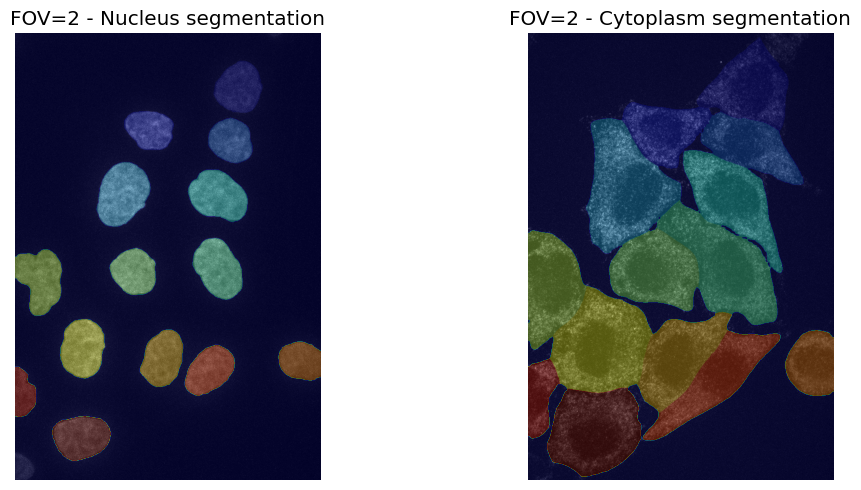

No Foci in this cell


In [9]:
# run this multiple times to see a new randomly selected cell
SD.display(newFOV=True, newCell=True) # num_fovs_to_display=2,num_cells_to_display=2, num_spots_to_display=4

In [10]:
df_spots = pd.DataFrame(SD.spots)
df_clusters = pd.DataFrame(SD.clusters)
df_cellspots = pd.DataFrame(SD.cellspots)
df_cellprops = pd.DataFrame(SD.cellprops)

# Print columns for each dataframe
print("df_spots columns:")
print(", ".join(df_spots.columns))

print("\ndf_clusters columns:")
print(", ".join(df_clusters.columns))

print("\ndf_cellspots columns:")
print(", ".join(df_cellspots.columns))

print("\ndf_cellprops columns:")
print(", ".join(df_cellprops.columns))

df_spots columns:
z_px, y_px, x_px, cluster_index, is_nuc, cell_label, nuc_label, snr, signal, timepoint, fov, FISH_Channel, condition, replica, time, Dex_Conc, NAS_location, h5_idx, keep_wsnr

df_clusters columns:
z_px, y_px, x_px, nb_spots, cluster_index, is_nuc, cell_label, nuc_label, timepoint, fov, FISH_Channel, condition, replica, time, Dex_Conc, NAS_location, h5_idx

df_cellspots columns:
cell_id, cell_area, nuc_area, nb_rna, nb_rna_in_nuc, nb_rna_out_nuc, nb_foci, nb_transcription_site, fov, timepoint, FISH_Channel, condition, replica, time, Dex_Conc, NAS_location, h5_idx

df_cellprops columns:
nuc_label, nuc_bbox-0, nuc_bbox-1, nuc_bbox-2, nuc_bbox-3, nuc_area, nuc_centroid-0, nuc_centroid-1, nuc_intensity_max-0, nuc_intensity_max-1, nuc_intensity_max-2, nuc_intensity_mean-0, nuc_intensity_mean-1, nuc_intensity_mean-2, nuc_intensity_min-0, nuc_intensity_min-1, nuc_intensity_min-2, nuc_intensity_std-0, nuc_intensity_std-1, nuc_intensity_std-2, cell_label, cell_bbox-0, cell_bbox

In [11]:
# Number of timepoints in the dataset
print(df_spots['time'].unique())
print(df_spots['h5_idx'].unique())

[  0  10 120 150 180  20  30  40  50  60  75  90]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


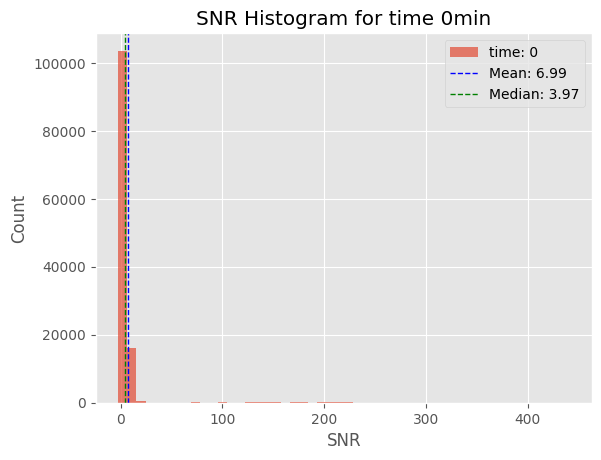

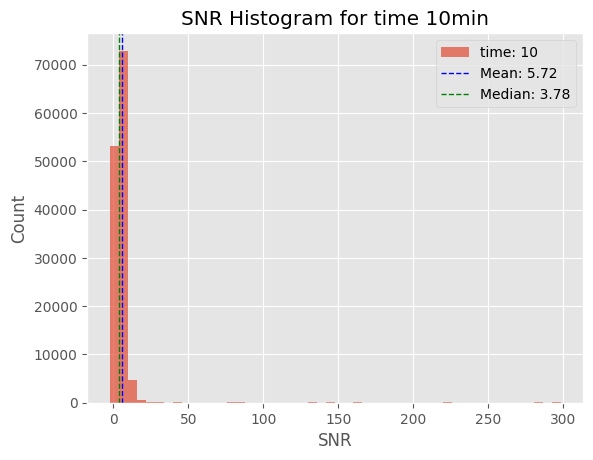

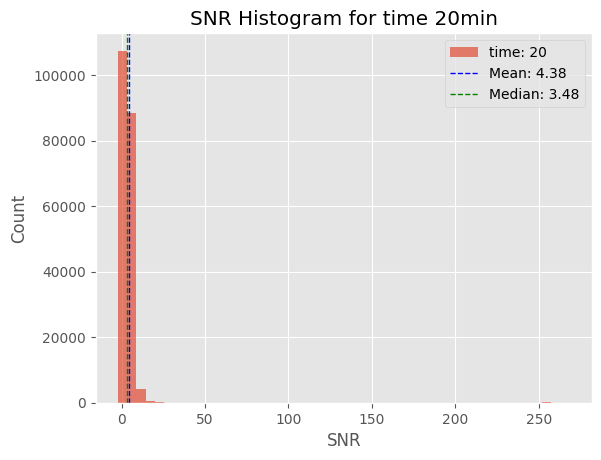

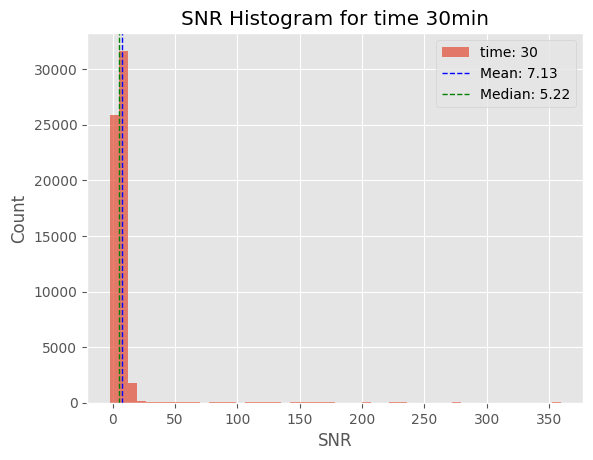

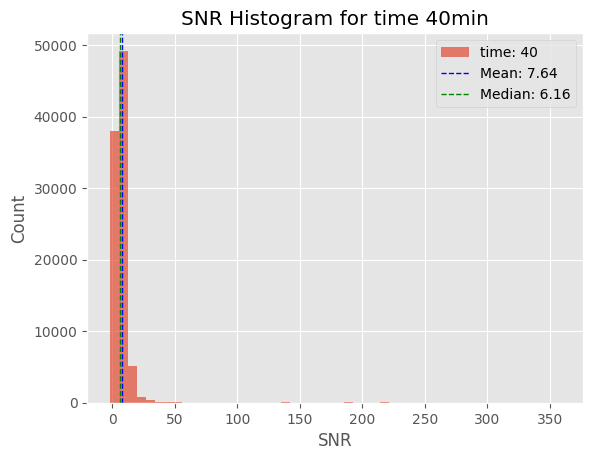

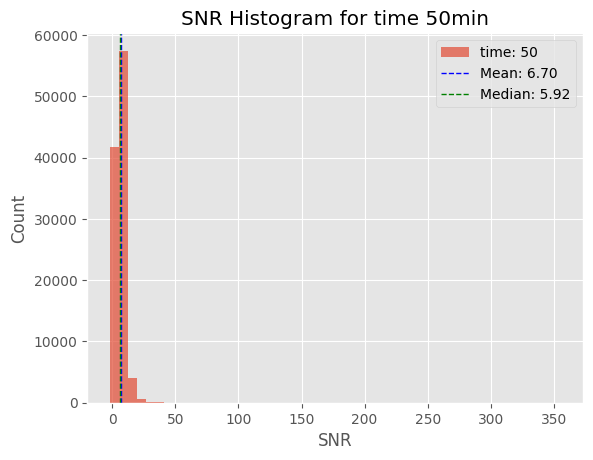

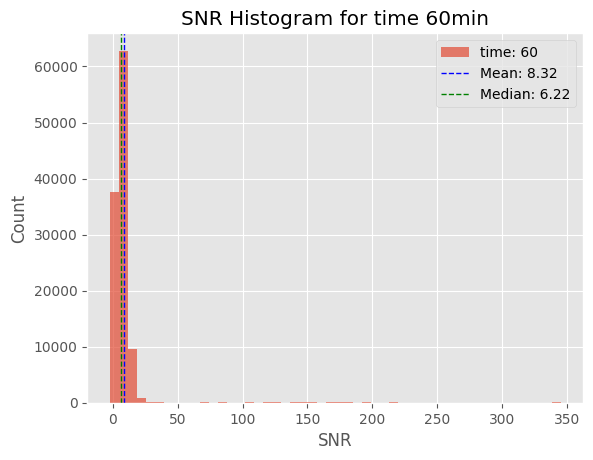

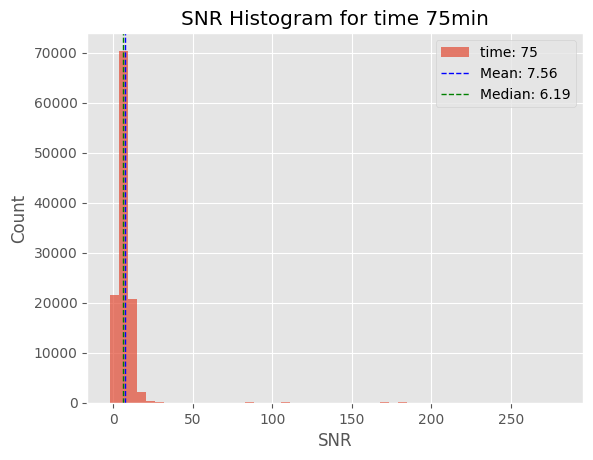

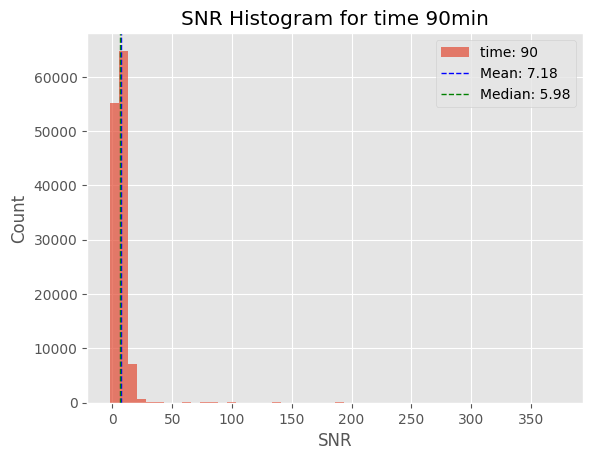

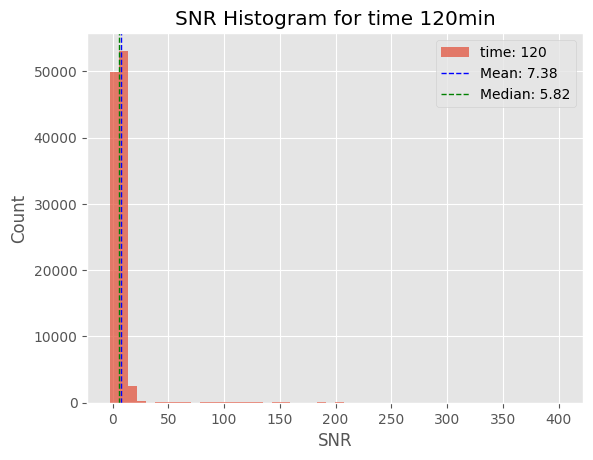

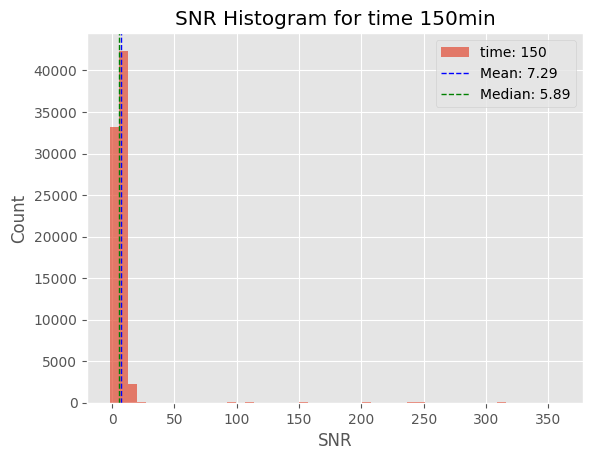

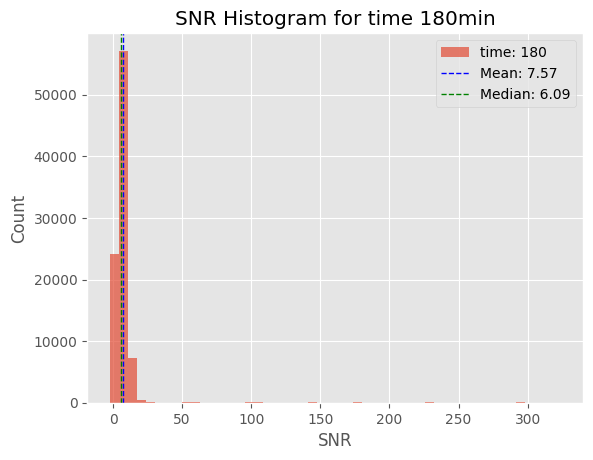

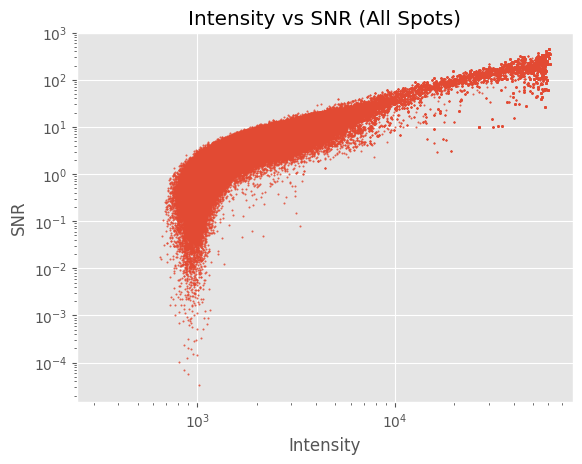

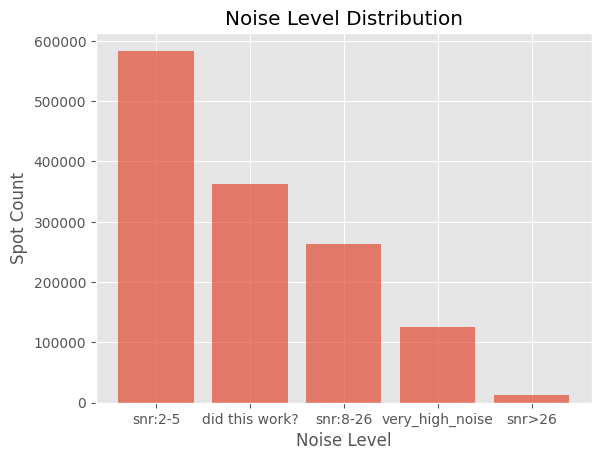

In [12]:
# Calculate statistics for all times
stats = df_spots.groupby('time')['snr'].agg(['mean', 'median', 'std'])

# Dynamic SNR thresholding based on mean ± 2*std
thresholds = {}
for time, row in stats.iterrows():
    thresholds[time] = (row['mean'] - 2 * row['std'], row['mean'] + 2 * row['std'])

# Apply dynamic thresholding
df_spots['threshold_pass'] = df_spots.apply(
    lambda row: thresholds[row['time']][0] <= row['snr'] <= thresholds[row['time']][1],
    axis=1
)

# Filtered DataFrame
df_spots_filtered = df_spots[df_spots['threshold_pass']]

# Categorize noise levels based on the paper's description
def categorize_noise(snr):
    if snr < 2:
        return 'very_high_noise'
    if 2 <= snr < 5:
        return 'snr:2-5'
    elif 8 <= snr <= 26:
        return 'snr:8-26'
    elif snr > 26:
        return 'snr>26'
    else:
        return 'did this work?'

df_spots['noise_level'] = df_spots['snr'].apply(categorize_noise)

# Plot histograms of SNR for each time
for time, group in df_spots.groupby('time'):
    mean_snr = group['snr'].mean()
    median_snr = group['snr'].median()
    std_snr = group['snr'].std()
    
    plt.hist(group['snr'], bins=50, alpha=0.7, label=f'time: {time}')
    plt.axvline(mean_snr, color='b', linestyle='dashed', linewidth=1, label=f'Mean: {mean_snr:.2f}')
    plt.axvline(median_snr, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_snr:.2f}')
    plt.title(f'SNR Histogram for time {time}min')
    plt.xlabel('SNR')
    plt.ylabel('Count')
    plt.legend()
    plt.show()


# Scatter Plot of Intensity vs SNR
plt.scatter(df_spots['signal'], df_spots['snr'], s=1, alpha=0.7)
plt.xlabel('Intensity')
plt.ylabel('SNR')
plt.title('Intensity vs SNR (All Spots)')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Noise Level Distribution
noise_level_counts = df_spots['noise_level'].value_counts()
plt.bar(noise_level_counts.index, noise_level_counts.values, alpha=0.7)
plt.title('Noise Level Distribution')
plt.xlabel('Noise Level')
plt.ylabel('Spot Count')
plt.show()


In [13]:
df_spots_filtered = df_spots[(df_spots['cell_label'] > 0)] # & (df_spots['cluster_index'] > -1)]
print(len(df_spots_filtered))

1259258


In [14]:
df_clusters = pd.DataFrame(SD.clusters)
df_clusters.columns
df_clusters_filtered = df_clusters[(df_clusters['is_nuc'] > 0)]
print(len(df_clusters_filtered))

1524


In [15]:
df_clusters['is_nuc'].unique()

array([1, 0])

In [16]:
SD.cellprops


nuc_label  nuc_bbox-0  nuc_bbox-1  nuc_bbox-2  nuc_bbox-3  nuc_area  \
1           2          45         221         162         326    9143.0   
2           3         132         429         239         536    8380.0   
0           1           0         363          64         490    5959.0   
7           8         409           0         482          33    1808.0   
6           7         354         251         478         350    9142.0   
..        ...         ...         ...         ...         ...       ...   
0           1           0           0          82         112    7322.0   
4           5         281         192         389         322    9794.0   
3           4         147         329         270         443   10210.0   
2           3         141          59         219         193    8529.0   
1           2         108         445         238         582   11183.0   

    nuc_centroid-0  nuc_centroid-1  nuc_intensity_max-0  nuc_intensity_max-1  \
1       103.318167      272.770863               3972.0               3690.0   
2       184.680191      483.856205               3103.0               2978.0   
0        25.538010      431.931868               1988.0               2389.0   
7       446.485619       13.118916               3604.0               3494.0   
6       413.736053      297.409320               5819.0               4151.0   
..             ...             ...                  ...                  ...   
0        37.274925       52.122508               3361.0               2837.0   
4       335.135389      257.814989               4343.0               3508.0   
3       212.896964      380.764643               5254.0               3926.0   
2       179.009145      126.005393               5922.0               3526.0   
1       172.149781      513.820710               3379.0               3152.0   

    ...  cyto_intensity_std-1  cyto_intensity_std-2  fov  timepoint  \
1   ...            391.138855             80.318779    0          0   
2   ...            379.397491             80.264748    0          0   
0   ...            347.327606             76.621811    0          0   
7   ...            510.316315             89.631386    0          0   
6   ...            587.853760            101.491501    0          0   
..  ...                   ...                   ...  ...        ...   
0   ...            427.466614             81.623459   29          0   
4   ...            558.789734             85.859512   29          0   
3   ...            439.247894             94.675491   29          0   
2   ...            385.999237             83.782867   29          0   
1   ...            365.526062             87.348274   29          0   

          condition  replica  time  Dex_Conc  \
1   DUSP1_timesweep        D     0         0   
2   DUSP1_timesweep        D     0         0   
0   DUSP1_timesweep        D     0         0   
7   DUSP1_timesweep        D     0         0   
6   DUSP1_timesweep        D     0         0   
..              ...      ...   ...       ...   
0   DUSP1_timesweep        D    90       100   
4   DUSP1_timesweep        D    90       100   
3   DUSP1_timesweep        D    90       100   
2   DUSP1_timesweep        D    90       100   
1   DUSP1_timesweep        D    90       100   

                                         NAS_location  h5_idx  
1   smFISH_images/Eric_smFISH_images/20220225/DUSP...       0  
2   smFISH_images/Eric_smFISH_images/20220225/DUSP...       0  
0   smFISH_images/Eric_smFISH_images/20220225/DUSP...       0  
7   smFISH_images/Eric_smFISH_images/20220225/DUSP...       0  
6   smFISH_images/Eric_smFISH_images/20220225/DUSP...       0  
..                                                ...     ...  
0   smFISH_images/Eric_smFISH_images/20220305/DUSP...      11  
4   smFISH_images/Eric_smFISH_images/20220305/DUSP...      11  
3   smFISH_images/Eric_smFISH_images/20220305/DUSP...      11  
2   smFISH_images/Eric_smFISH_images/20220305/DUSP...      11  
1   smFI

In [17]:
df = pd.DataFrame(SD.cellprops) 

In [18]:
df.columns

Index(['nuc_label', 'nuc_bbox-0', 'nuc_bbox-1', 'nuc_bbox-2', 'nuc_bbox-3',
       'nuc_area', 'nuc_centroid-0', 'nuc_centroid-1', 'nuc_intensity_max-0',
       'nuc_intensity_max-1', 'nuc_intensity_max-2', 'nuc_intensity_mean-0',
       'nuc_intensity_mean-1', 'nuc_intensity_mean-2', 'nuc_intensity_min-0',
       'nuc_intensity_min-1', 'nuc_intensity_min-2', 'nuc_intensity_std-0',
       'nuc_intensity_std-1', 'nuc_intensity_std-2', 'cell_label',
       'cell_bbox-0', 'cell_bbox-1', 'cell_bbox-2', 'cell_bbox-3', 'cell_area',
       'cell_centroid-0', 'cell_centroid-1', 'cell_intensity_max-0',
       'cell_intensity_max-1', 'cell_intensity_max-2', 'cell_intensity_mean-0',
       'cell_intensity_mean-1', 'cell_intensity_mean-2',
       'cell_intensity_min-0', 'cell_intensity_min-1', 'cell_intensity_min-2',
       'cell_intensity_std-0', 'cell_intensity_std-1', 'cell_intensity_std-2',
       'touching_border', 'cyto_label', 'cyto_bbox-0', 'cyto_bbox-1',
       'cyto_bbox-2', 'cyto_bbox-3

In [19]:
df_cellspots = pd.DataFrame(SD.cellspots)
df_cellspots.columns

Index(['cell_id', 'cell_area', 'nuc_area', 'nb_rna', 'nb_rna_in_nuc',
       'nb_rna_out_nuc', 'nb_foci', 'nb_transcription_site', 'fov',
       'timepoint', 'FISH_Channel', 'condition', 'replica', 'time', 'Dex_Conc',
       'NAS_location', 'h5_idx'],
      dtype='object')

In [20]:
num_TS = df_cellspots[(df_cellspots['nb_transcription_site'] > 0)]
print(len(num_TS))

909


In [21]:
# find cells that have props but arent in the cell spots
allcells = SD.cellprops
cells_wSpots = SD.cellspots
# Find cells that are in allcells but not in cells_wSpots
merged = allcells.merge(cells_wSpots, how='left', left_on=['nuc_label', 'fov', 'NAS_location'], right_on=['cell_id', 'fov', 'NAS_location'], indicator=True)
print(merged.shape)
same_entries = merged[merged['_merge'] == 'both'].drop(columns=['cell_id', '_merge'])
different_entries = merged[merged['_merge'] == 'left_only'].drop(columns=['cell_id', '_merge'])

print("Same entries:")
print(same_entries.shape)
print("\nDifferent entries:")
print(different_entries.shape)

(5439, 85)
Same entries:
(3649, 83)

Different entries:
(1790, 83)


There are 5439 cells in this data set
There are 3649 cells with spots
957 cells are touching the border and are not counted


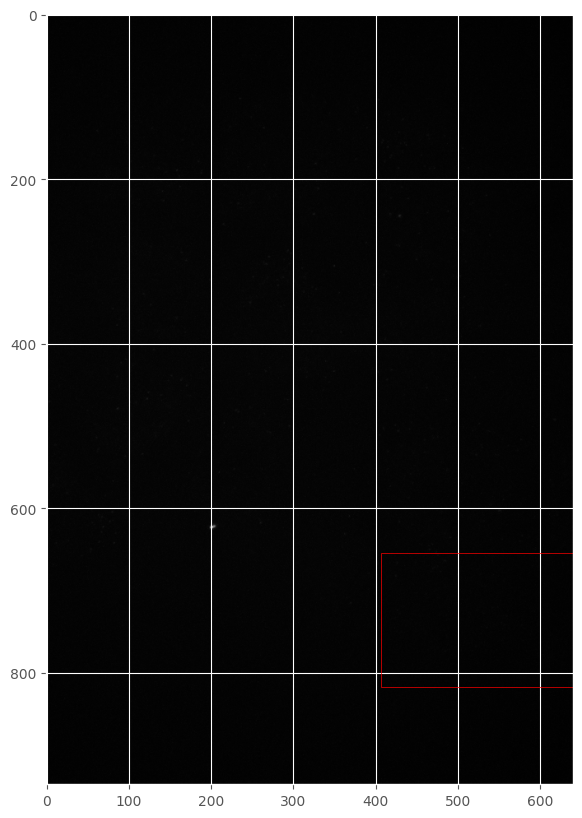

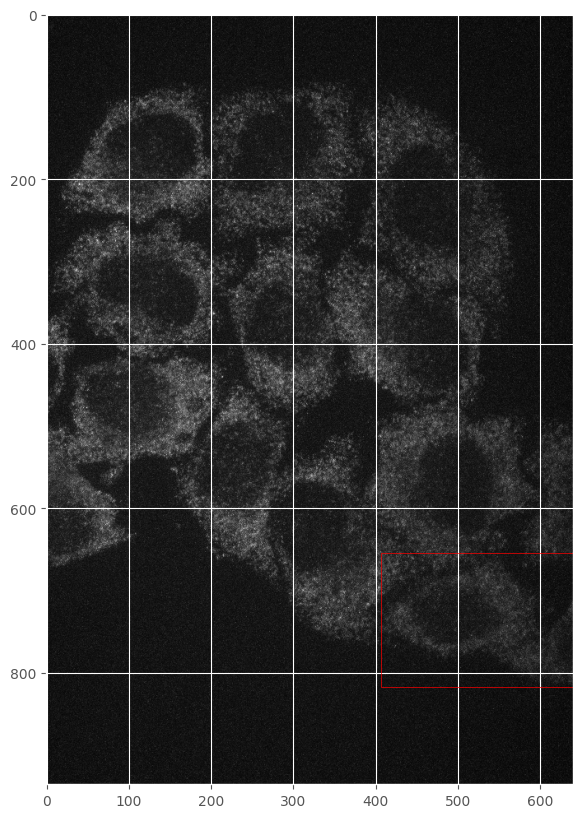

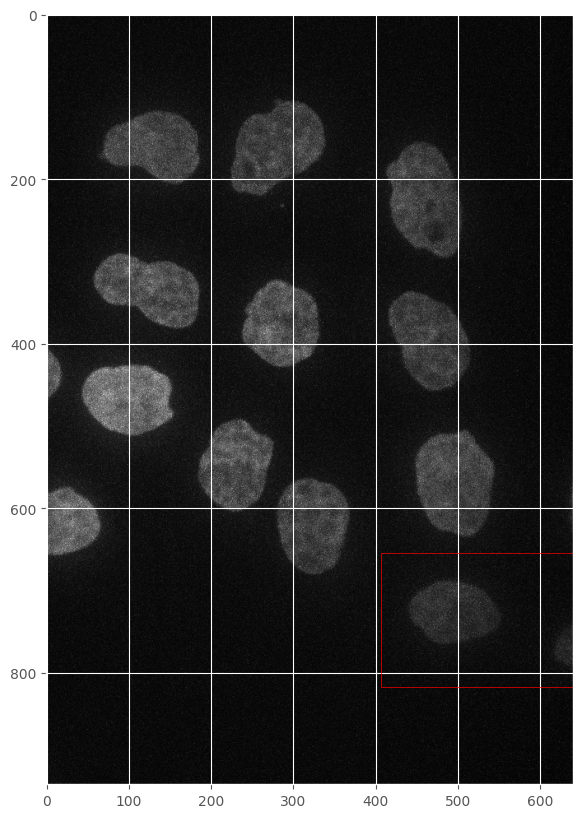

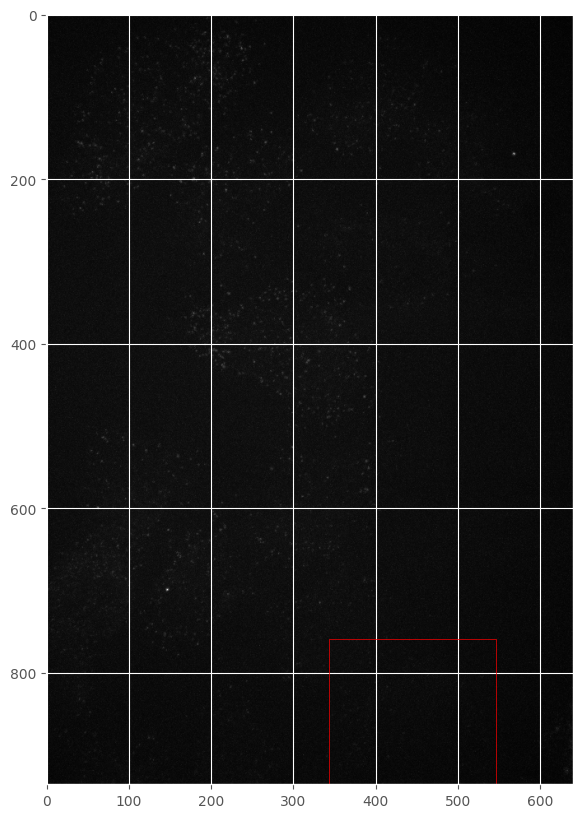

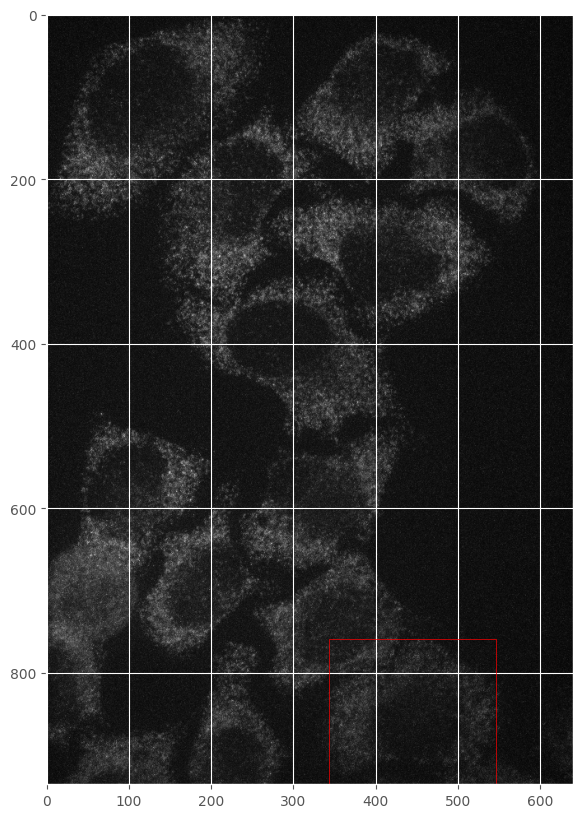

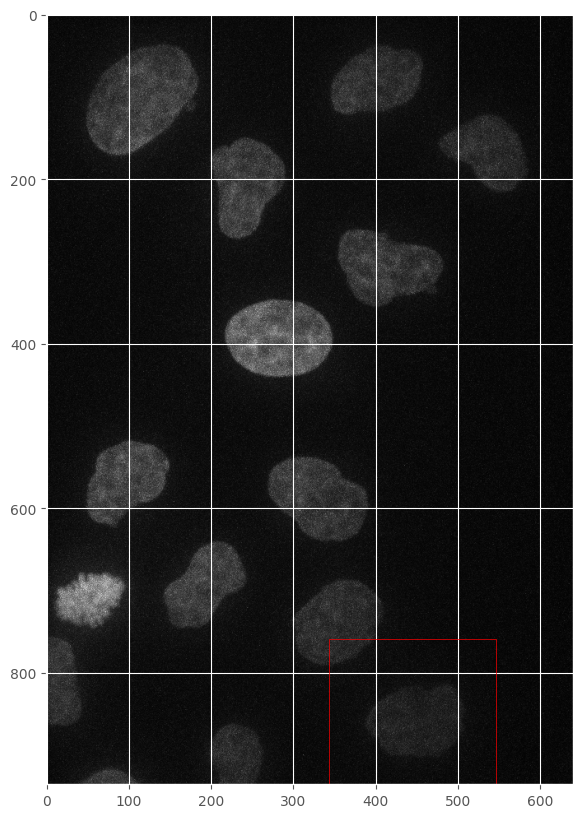

In [22]:
import random
import dask.array as da
print(f'There are {allcells.shape[0]} cells in this data set')
print(f'There are {cells_wSpots.shape[0]} cells with spots')

# how many are have bounded boxes touching the border
print(f'{different_entries['touching_border'].sum()} cells are touching the border and are not counted')

# Select a random row from the different_entries dataframe
for _ in range(2):
    random_row = different_entries[~different_entries['touching_border']].sample(n=1).iloc[0]

    # Read the h5 file
    h5_file = random_row['NAS_location']
    h5_file = os.path.join(r'\\munsky-nas.engr.colostate.edu\share', h5_file) # TODO this will need to be updated so you dont have to find it to get it to work
    with h5py.File(h5_file, 'r') as f:
        # Grab the mask and raw_image
        masks = da.from_array(f['/masks'])
        raw_images = da.from_array(f['/raw_images'])

        # Extract the bounding box coordinates
        bbox = [random_row['cell_bbox-0'], random_row['cell_bbox-1'], random_row['cell_bbox-2'], random_row['cell_bbox-3']]

        img = raw_images[random_row['fov'], random_row['timepoint_x']].squeeze()
        for c in range(img.shape[0]):
            # Display the raw image with the selected cell highlighted
            t = np.max(img[c, :, :,:], axis=0)
            t.compute()
            fig, ax = plt.subplots(1, 1, figsize=(10, 10))
            ax.imshow(t, cmap='gray')
            rect = plt.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0], edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.show()

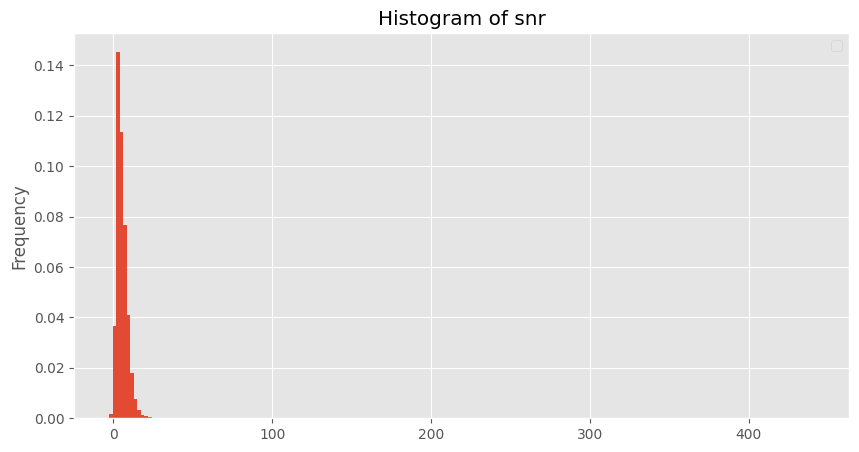

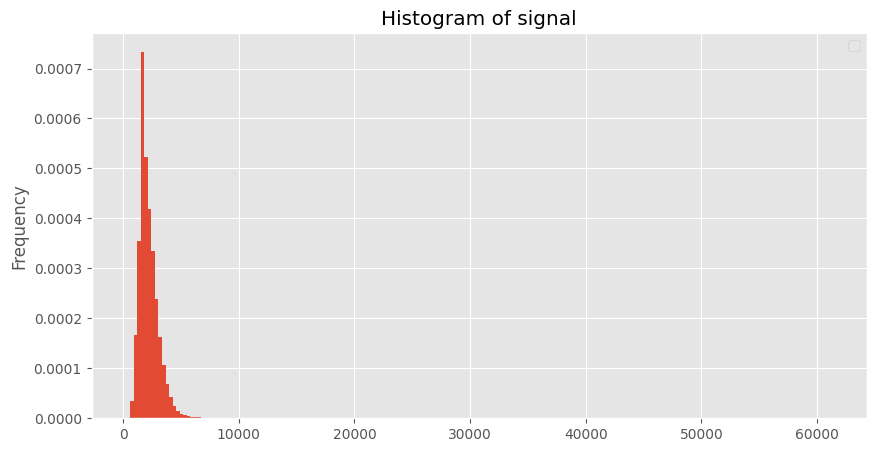

In [23]:
# Histogram of spots
keys_to_plot = ['signal', 'snr']
for k in SD.spots.keys():
    if k in keys_to_plot:
        # Plot histogram for 'area'
        plt.figure(figsize=(10, 5))
        plt.hist(SD.spots[k], bins=200, density=True)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {k}')
        plt.legend()
        plt.show()

In [24]:
SD.cellspots.keys()

Index(['cell_id', 'cell_area', 'nuc_area', 'nb_rna', 'nb_rna_in_nuc',
       'nb_rna_out_nuc', 'nb_foci', 'nb_transcription_site', 'fov',
       'timepoint', 'FISH_Channel', 'condition', 'replica', 'time', 'Dex_Conc',
       'NAS_location', 'h5_idx'],
      dtype='object')

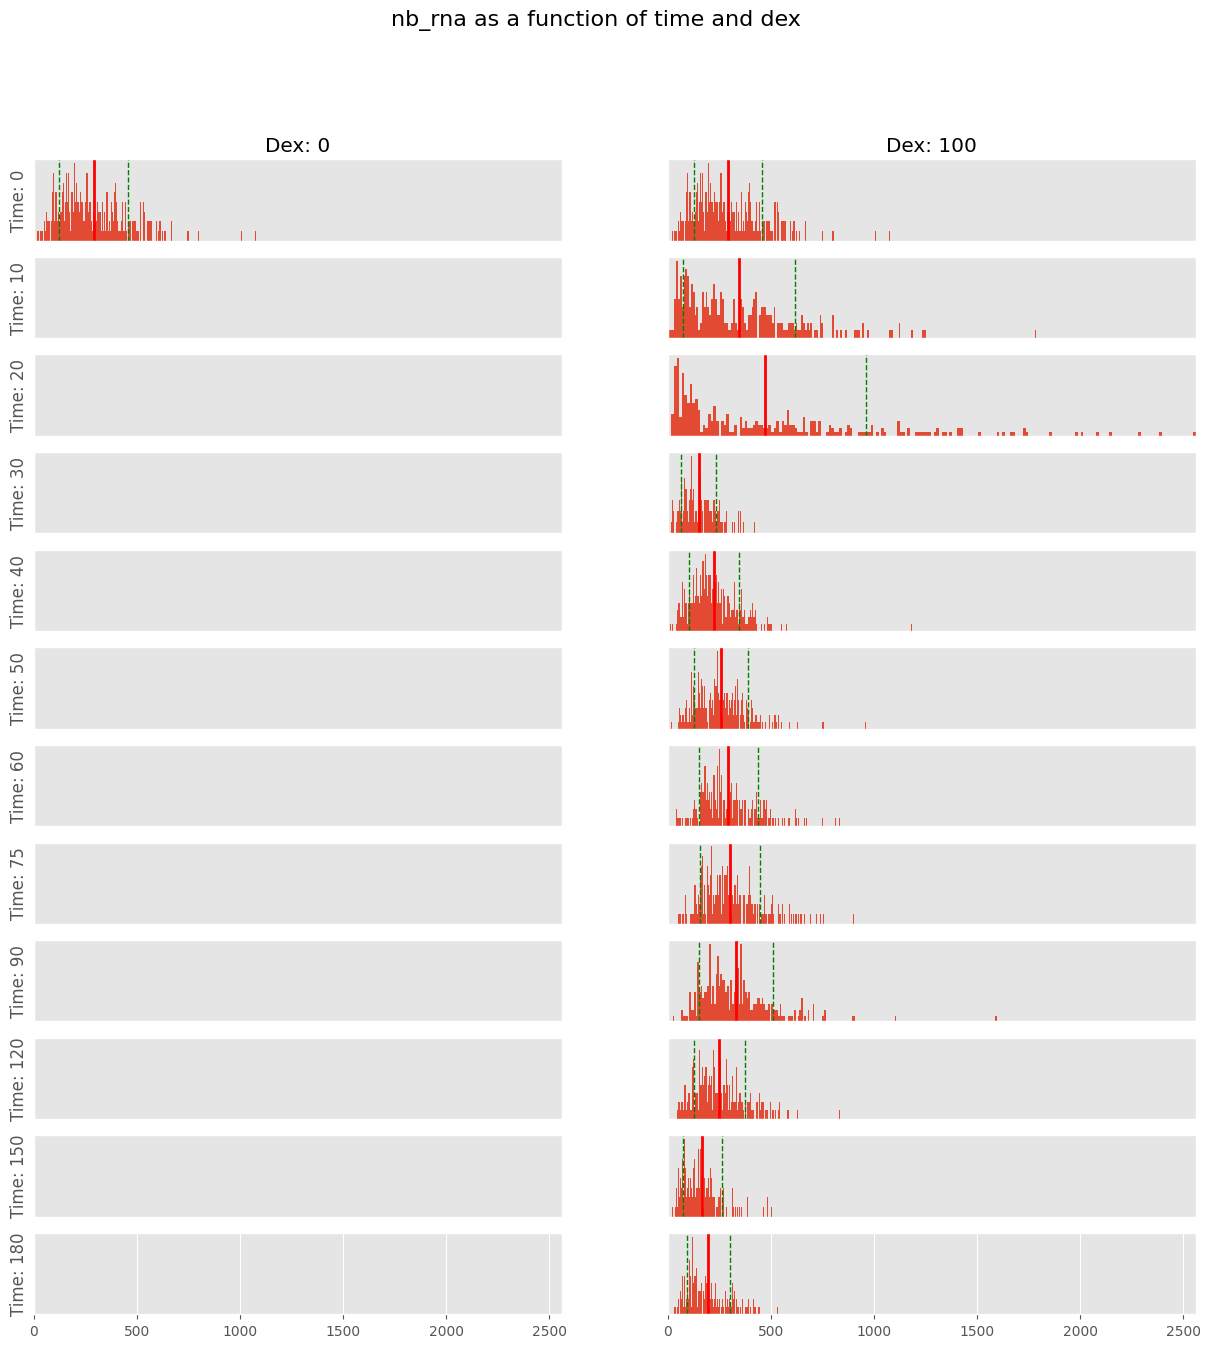

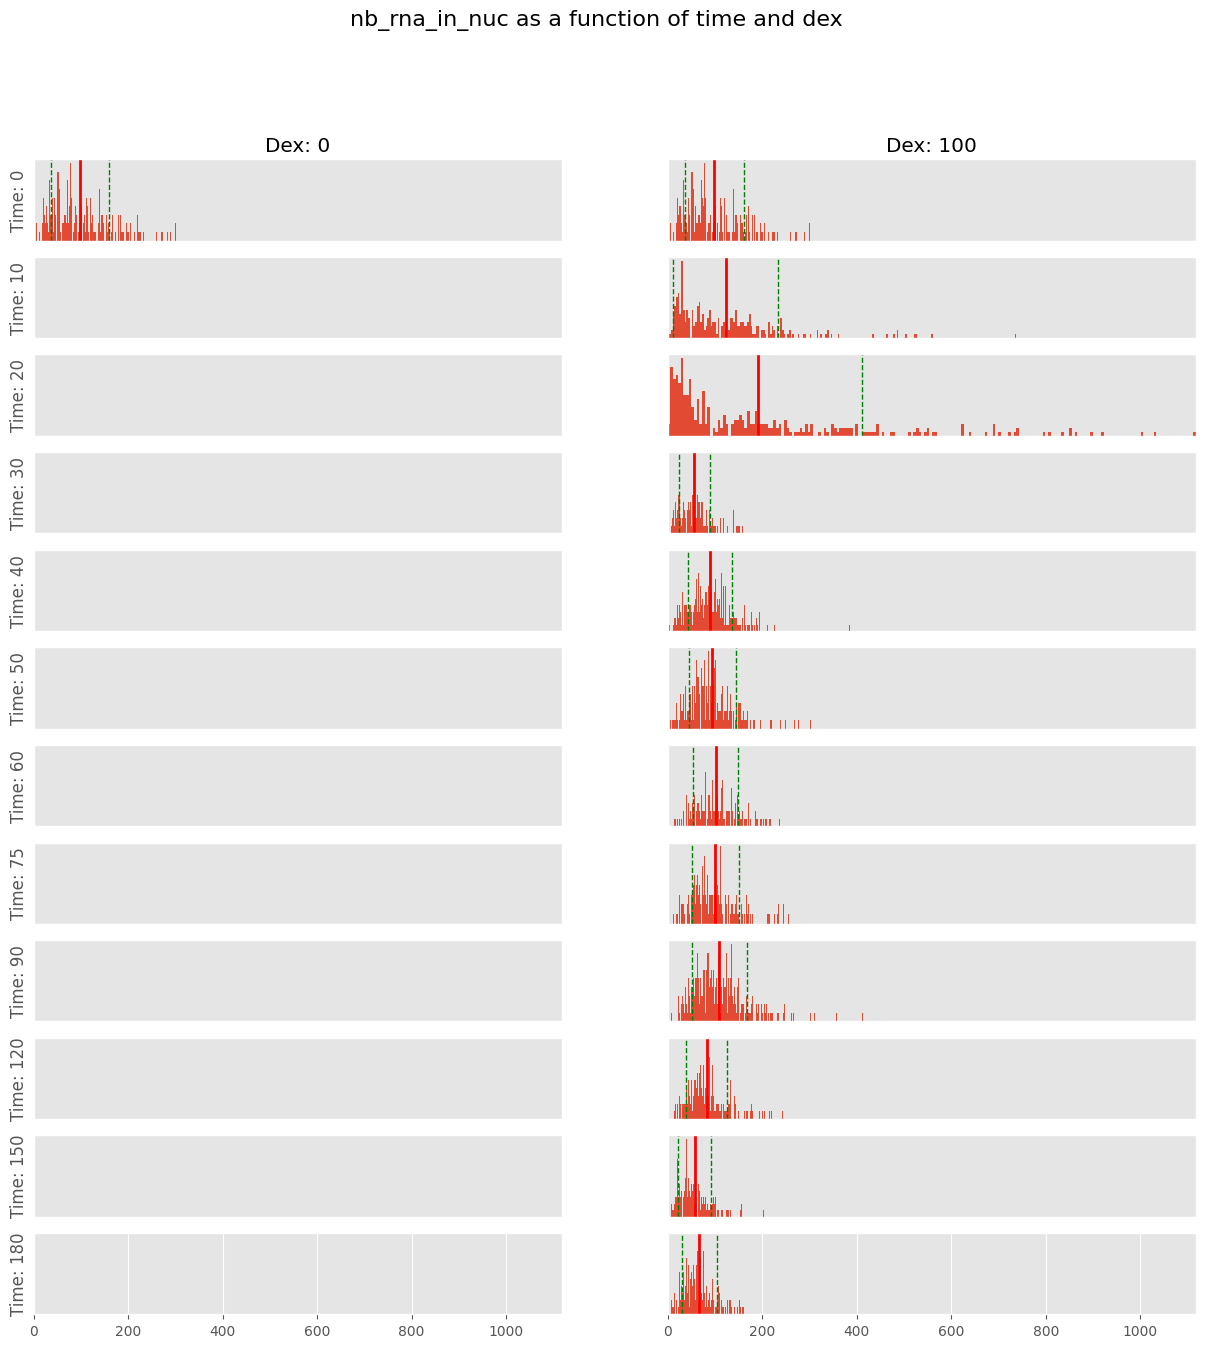

In [25]:
# spot counts as a function of time and dex
keys_to_plot = ['nb_rna', 'nb_rna_in_nuc']


tp_set = sorted(set(SD.cellspots['time']))
dex_set = sorted(set(SD.cellspots['Dex_Conc']))
for k in keys_to_plot:
    fig, axs = plt.subplots(len(tp_set), len(dex_set), figsize=(15, 15))
    fig.suptitle(f'{k} as a function of time and dex', fontsize=16)
    for i_d, d in enumerate(dex_set):
        data = SD.cellspots[SD.cellspots['Dex_Conc'] == d]
        for i_t, t in enumerate(tp_set):
            temp = data[data['time'] == t]
            mean_val = temp[k].mean()
            std_val = temp[k].std()
            if d == 0 and t == 0:
                for ax in axs[i_t, :]:
                    ax.hist(temp[k], bins=200, density=True)
                    ax.axvline(mean_val, color='r', linestyle='solid', linewidth=2)
                    ax.axvline(mean_val + std_val, color='g', linestyle='dashed', linewidth=1)
                    ax.axvline(mean_val - std_val, color='g', linestyle='dashed', linewidth=1)
                    ax.set_xlim([0, SD.cellspots[k].max()])
                    ax.grid(True)  # Turn on grid lines
                    if i_t != len(tp_set) - 1:
                        axs[i_t, i_d].set_xticks([])
                    ax.set_yticks([])
                axs[i_t, 0].set_ylabel(f'Time: {t}')
            else:
                axs[i_t, i_d].hist(temp[k], bins=200, density=True)
                axs[i_t, i_d].axvline(mean_val, color='r', linestyle='solid', linewidth=2)
                axs[i_t, i_d].axvline(mean_val + std_val, color='g', linestyle='dashed', linewidth=1)
                axs[i_t, i_d].axvline(mean_val - std_val, color='g', linestyle='dashed', linewidth=1)
                axs[i_t, i_d].set_xlim([0, SD.cellspots[k].max()])
                axs[i_t, i_d].grid(True)  # Turn on grid lines
                if i_t != len(tp_set) - 1:
                    axs[i_t, i_d].set_xticks([])
                axs[i_t, i_d].set_yticks([])
                axs[i_t, 0].set_ylabel(f'Time: {t}')
                axs[0, i_d].set_title(f'Dex: {d}')
    plt.show()



## Weighted Approach

In this approach, every spot is retained but given a weight reflecting its estimated reliability. Higher weights indicate higher trust in that spot.

### Example Weight Scheme
Based on the paper’s reported errors:

- **SNR < 2**: Discard (weight = 0.0)
- **2 ≤ SNR < 5**: High noise, ~24% error ⇒ reliability ~ 76% ⇒ weight = 0.76
- **5 ≤ SNR < 8**: Not explicitly given, but presumably better than 24% error ⇒ weight = 0.85
- **8 ≤ SNR ≤ 26**: Medium/low noise, ~1.4–5.5% error ⇒ reliability ~ 94–98.6% ⇒ weight = 0.95
- **SNR > 26**: Very low noise, ~1.4% (or lower) error ⇒ ~98.6% reliability ⇒ weight = 0.99

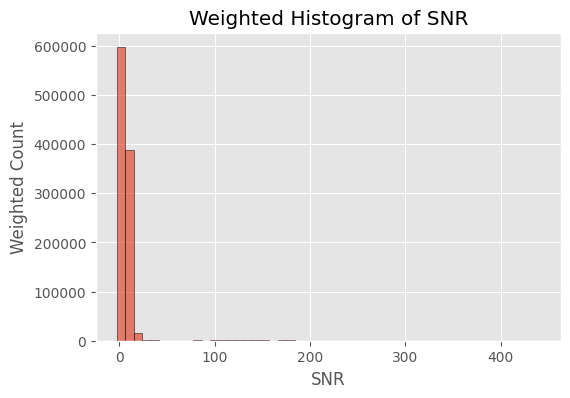

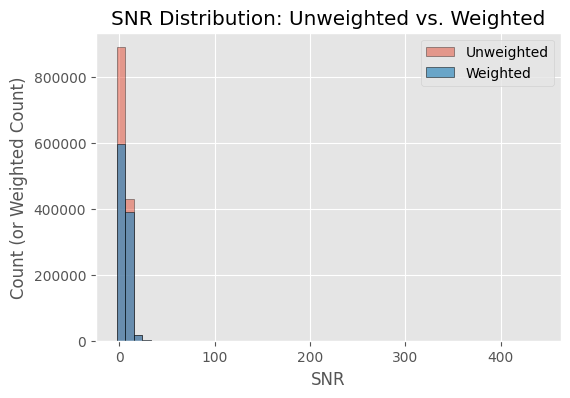

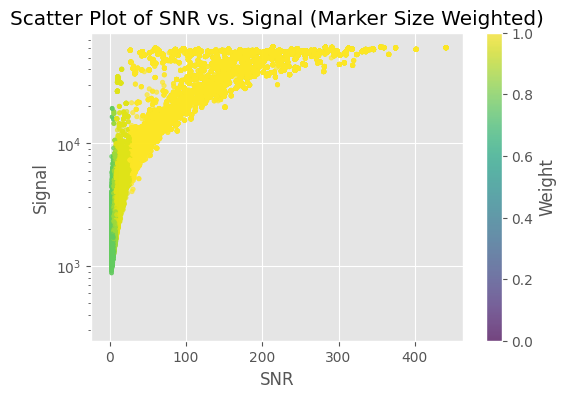

weighted Count by SNR Bin:
          count
snr_bin        
<2       113799
2–5      583787
5–8      362716
8–26     263783
>26       12727


In [27]:
# Weighted snr analysis

# 1. Assign Weights Based on SNR Ranges
def assign_weight(snr):
    """Return a weight based on known or estimated detection reliability."""
    if snr < 2:
        # Very noisy => discard
        return 0.0
    elif 2 <= snr < 5:
        # High noise => ~24% error => ~76% reliable
        return 0.76
    elif 5 <= snr < 8:
        # Intermediate between high & medium => guess ~85% reliability
        return 0.85
    elif 8 <= snr <= 26:
        # Medium/low noise => 1.4–5.5% error => pick ~95% reliability
        return 0.95
    else:  # snr > 26
        return 1

df_spots['weight'] = df_spots['snr'].apply(assign_weight)

# 2. Weighted Histogram of SNR
plt.figure(figsize=(6, 4))
plt.hist(
    df_spots['snr'], 
    bins=50, 
    weights=df_spots['weight'], 
    alpha=0.7,
    edgecolor='black'
)
plt.title('Weighted Histogram of SNR')
plt.xlabel('SNR')
plt.ylabel('Weighted Count')
plt.show()

# 3. Compare Weighted vs. Unweighted Histograms
plt.figure(figsize=(6, 4))

# Unweighted
plt.hist(
    df_spots['snr'], 
    bins=50, 
    alpha=0.5, 
    label='Unweighted', 
    edgecolor='black'
)

# Weighted
plt.hist(
    df_spots['snr'], 
    bins=50, 
    weights=df_spots['weight'], 
    alpha=0.7, 
    label='Weighted', 
    edgecolor='black'
)
plt.title('SNR Distribution: Unweighted vs. Weighted')
plt.xlabel('SNR')
plt.ylabel('Count (or Weighted Count)')
plt.legend()
plt.show()

# 4. Weighted Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(
    df_spots['snr'], 
    df_spots['signal'], 
    s=10 * df_spots['weight'],  # scale dot size by weight
    c=df_spots['weight'],       # color also by weight (optional)
    cmap='viridis', 
    alpha=0.7
)
plt.title('Scatter Plot of SNR vs. Signal (Marker Size Weighted)')
plt.xlabel('SNR')
plt.ylabel('Signal')
plt.colorbar(label='Weight')
plt.yscale('log')  # if you want log scale for signal
plt.show()

# 5. Basic Statistics Showing Mean Weight per SNR Range
bins = [0, 2, 5, 8, 26, np.inf]
labels = ['<2', '2–5', '5–8', '8–26', '>26']
df_spots['snr_bin'] = pd.cut(df_spots['snr'], bins=bins, labels=labels)

stats_weight = df_spots.groupby('snr_bin')['weight'].agg(['count'])
print("weighted Count by SNR Bin:")
print(stats_weight)


## Probabilistic Approach

Here, instead of giving each spot a continuous weight, we use a Bernoulli process to decide per spot whether it’s kept or discarded, based on an estimated probability of being a true positive (TP).

### Estimate Probability of True Positive \(P(TP|SNR)\)
Sample from a Bernoulli distribution:

### Example Probability Scheme
Using the same error logic:

- **SNR < 2**: \(P(TP) = 0\) (discard)
- **2 ≤ SNR < 5**: error \(\approx 24\%\) ⇒ \(P(TP) = 0.76\)
- **5 ≤ SNR < 8**: intermediate guess \(P(TP) = 0.85\)
- **8 ≤ SNR ≤ 26**: error \(\approx 1.4\% - 5.5\%\) ⇒ \(P(TP) = 0.95\)
- **SNR > 26**: error \(\approx 1.4\%\) ⇒ \(P(TP) \approx 0.986\)


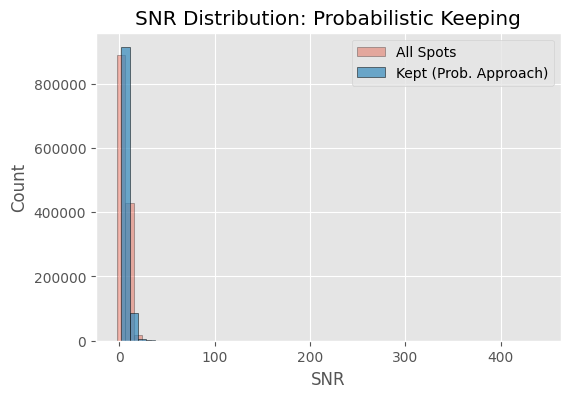

Kept Spots: 1015171, Discarded Spots: 332468
Kept fractions over multiple runs: [np.float64(0.7534532615930527), np.float64(0.75310227739031), np.float64(0.7532543952794479), np.float64(0.7533130163196524), np.float64(0.7537011024465751)]


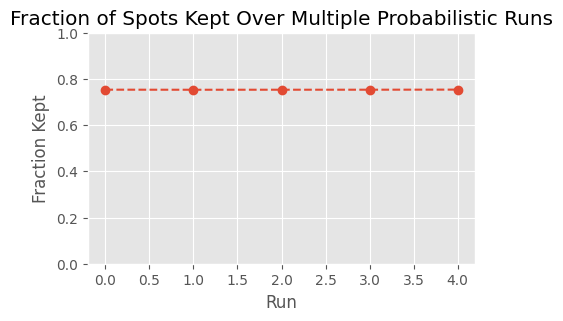

In [28]:
# 1. Define Probability of True Positive
def prob_true_positive(snr):
    """Return P(TP) based on known or estimated detection error."""
    if snr < 2:
        return 0.0
    elif 2 <= snr < 5:
        return 0.76
    elif 5 <= snr < 8:
        return 0.85
    elif 8 <= snr <= 26:
        return 0.95
    else:  # snr > 26
        return 0.986

df_spots['pTP'] = df_spots['snr'].apply(prob_true_positive)

# 2. Single Realization (One Draw per Spot)
np.random.seed(42)  # For reproducibility
df_spots['keep_prob_approach'] = np.random.rand(len(df_spots)) < df_spots['pTP']

# 3. Visualize Kept vs. Discarded
df_kept = df_spots[df_spots['keep_prob_approach'] == True]
df_disc = df_spots[df_spots['keep_prob_approach'] == False]

plt.figure(figsize=(6, 4))
plt.hist(
    df_spots['snr'], 
    bins=50, 
    alpha=0.4, 
    label='All Spots', 
    edgecolor='black'
)
plt.hist(
    df_kept['snr'], 
    bins=50, 
    alpha=0.7, 
    label='Kept (Prob. Approach)', 
    edgecolor='black'
)
plt.title('SNR Distribution: Probabilistic Keeping')
plt.xlabel('SNR')
plt.ylabel('Count')
plt.legend()
plt.show()

# 4. Compare Number of Spots Kept vs. Discarded
kept_count = len(df_kept)
discarded_count = len(df_disc)
print(f"Kept Spots: {kept_count}, Discarded Spots: {discarded_count}")

# 5. (Optional) Multiple Realizations
# If you want to see how stable the approach is over multiple runs
n_runs = 5
kept_fractions = []
for i in range(n_runs):
    # Draw Bernoulli for each spot
    keep_vec = np.random.rand(len(df_spots)) < df_spots['pTP']
    # Fraction of spots kept
    kept_fraction = keep_vec.mean()
    kept_fractions.append(kept_fraction)

print("Kept fractions over multiple runs:", kept_fractions)
plt.figure(figsize=(5, 3))
plt.plot(range(n_runs), kept_fractions, marker='o', linestyle='--')
plt.ylim(0, 1)
plt.title('Fraction of Spots Kept Over Multiple Probabilistic Runs')
plt.xlabel('Run')
plt.ylabel('Fraction Kept')
plt.show()

In [52]:
SD.cellprops.shape

(5439, 70)

In [30]:
# create unique cell id for every cells
SD.cellprops['unique_cell_id'] = np.arange(len(SD.cellprops))

In [41]:
SD.spots = SD.spots.merge(SD.cellprops[['NAS_location', 'cell_label', 'fov', 'unique_cell_id']], 
                            on=['NAS_location', 'cell_label', 'fov'], 
                            how='left')
SD.clusters = SD.clusters.merge(SD.cellprops[['NAS_location', 'cell_label', 'fov', 'unique_cell_id']], 
                            on=['NAS_location', 'cell_label', 'fov'], 
                            how='left')

In [47]:
def measure(spots, clusters, props) -> pd.DataFrame:
    results = pd.DataFrame(columns=['cell_id', 'num_ts', 'num_foci', 'num_spots', 'num_nuc_spots', 'num_cyto_spots', 
                                    'nuc_area_px', 'cyto_area_px', 'avg_nuc_int', 'avg_cyto_int', 'time', 'Dex_conc'])
    
    # unique cell id
    cell_ids = props['unique_cell_id']

    # num of ts
    num_ts = clusters[clusters['is_nuc'] == 1].groupby('unique_cell_id').size().reindex(cell_ids, fill_value=0)

    # num of foci
    num_foci = clusters[clusters['is_nuc'] == 0].groupby('unique_cell_id').size().reindex(cell_ids, fill_value=0)

    # num of spots
    num_spots = spots.groupby('unique_cell_id').size().reindex(cell_ids, fill_value=0)

    # num of spot in nuc
    num_nuc_spots = spots[spots['is_nuc'] == 1].groupby('unique_cell_id').size().reindex(cell_ids, fill_value=0)

    # num of spot in cyto 
    num_cyto_spots = spots[spots['is_nuc'] == 0].groupby('unique_cell_id').size().reindex(cell_ids, fill_value=0)

    # nuc area
    nuc_area = props['nuc_area']

    # cyto area
    cyto_area = props['cyto_area']

    # avg int nuc
    avg_nuc_int = props['nuc_intensity_mean-0']
    
    # avg int cyto
    avg_cyto_int = props['cyto_intensity_mean-0']

    # time (experiment)
    time = props['time'] 

    # Dex conc
    dex_conc = props['Dex_Conc']

    results['cell_id'] = cell_ids
    results['num_ts'] = num_ts.values
    results['num_foci'] = num_foci.values
    results['num_spots'] = num_spots.values
    results['num_nuc_spots'] = num_nuc_spots.values
    results['num_cyto_spots'] = num_cyto_spots.values
    results['nuc_area_px'] = nuc_area.values
    results['cyto_area_px'] = cyto_area.values
    results['avg_nuc_int'] = avg_nuc_int.values
    results['avg_cyto_int'] = avg_cyto_int.values
    results['time'] = time.values
    results['Dex_conc'] = dex_conc.values

    return results

In [50]:
cell_spots = measure(SD.spots, SD.clusters, SD.cellprops)
cell_spots

cell_id  num_ts  num_foci  num_spots  num_nuc_spots  num_cyto_spots  \
1         0       0         0        293             59             234   
2         1       0         1        162             22             140   
0         2       0         0         48              4              44   
7         3       0         0         86             29              57   
6         4       1         0        284            149             135   
..      ...     ...       ...        ...            ...             ...   
0      5434       0         0        112             39              73   
4      5435       0         0        106             35              71   
3      5436       0         0        260            101             159   
2      5437       3         5        418            133             285   
1      5438       0         0        149             62              87   

    nuc_area_px  cyto_area_px  avg_nuc_int  avg_cyto_int  time  Dex_conc  
1        9143.0       18328.0  1274.523438   1302.090820     0         0  
2        8380.0       14376.0  1249.474976   1298.521851     0         0  
0        5959.0        7642.0  1099.039795   1166.331909     0         0  
7        1808.0        4071.0  1426.062500   1395.833740     0         0  
6        9142.0        7840.0  1515.315796   1485.579224     0         0  
..          ...           ...          ...           ...   ...       ...  
0        7322.0        7337.0  1155.195068   1206.308716    90       100  
4        9794.0       17605.0  1364.220581   1374.418579    90       100  
3       10210.0       21814.0  1315.135864   1250.242798    90       100  
2        8529.0       23899.0  1361.131592   1338.941406    90       100  
1       11183.0       23476.0  1191.507812   1126.187134    90       100  

[5439 rows x 12 columns]

In [51]:
# Ensure num_spots = num_nuc_spots + num_cyto_spots for all rows
assert (cell_spots['num_spots'] == cell_spots['num_nuc_spots'] + cell_spots['num_cyto_spots']).all(), "Mismatch in spot counts"

In [56]:
SD.cellspots.keys()

Index(['cell_id', 'cell_area', 'nuc_area', 'nb_rna', 'nb_rna_in_nuc',
       'nb_rna_out_nuc', 'nb_foci', 'nb_transcription_site', 'fov',
       'timepoint', 'FISH_Channel', 'condition', 'replica', 'time', 'Dex_Conc',
       'NAS_location', 'h5_idx', 'cell_label', 'unique_cell_id'],
      dtype='object')

In [55]:
SD.cellspots = SD.cellspots.merge(SD.cellprops[['NAS_location', 'cell_label', 'fov', 'unique_cell_id']], 
                                    left_on=['NAS_location', 'cell_id', 'fov'], 
                                    right_on=['NAS_location', 'cell_label', 'fov'], 
                                    how='left')

In [103]:
# Align indices before performing the assertion
aligned_nb_rna = SD.cellspots.set_index('unique_cell_id')['nb_rna'].reindex(cell_spots.set_index('cell_id').index)
aligned_num_spots = cell_spots.set_index('cell_id')['num_spots']

# Drop NaN values from aligned_nb_rna
aligned_nb_rna = aligned_nb_rna.dropna()

# Ensure aligned_num_spots only contains indices present in aligned_nb_rna
aligned_num_spots = aligned_num_spots.loc[aligned_nb_rna.index]

not_close_indices = np.where(~np.isclose(aligned_nb_rna, aligned_num_spots, rtol = 0.01))[0]
print("Indices where nb_rna and num_spots are not close:", len(not_close_indices))

assert (np.isclose(aligned_nb_rna,aligned_num_spots, rtol = 0.4)).all(), "Mismatch in nb_rna and num_spots counts"



Indices where nb_rna and num_spots are not close: 743


In [104]:
print(f"{'bigfish counting':<30} {'my counting':<30}")
for bf, my in zip(aligned_nb_rna.iloc[not_close_indices], aligned_num_spots.iloc[not_close_indices]):
    print(f"{bf:<30} {my:<30}")

bigfish counting               my counting                   
277.0                          284                           
488.0                          503                           
402.0                          410                           
376.0                          380                           
530.0                          538                           
334.0                          338                           
290.0                          294                           
395.0                          399                           
262.0                          266                           
227.0                          231                           
279.0                          283                           
270.0                          274                           
613.0                          655                           
186.0                          206                           
98.0                           103                           
195.0   

np.int64(352)

In [34]:
am.close()